# Data Processing

In [1]:
import numpy as np
import sys
from os import listdir
from matplotlib import pyplot as plt
from random import shuffle
from matplotlib import image as mpimg
import cv2
import csv

#### Convert images to CSVs and split into training and validation sets

In the process_image function a closing is a dilation followed by an erosion. As the name suggests, a closing is used to close holes inside of objects or for connecting components together.

In [2]:
def image_processing(image, closing_kernel=None, dilation_kernel=None):
    if closing_kernel is None:
        closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    if dilation_kernel is None:
        dilation_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    processed_image = image < 127
    processed_image = processed_image.astype(np.uint8)
    processed_image = cv2.morphologyEx(processed_image, cv2.MORPH_CLOSE, closing_kernel)
    processed_image = cv2.dilate(processed_image, dilation_kernel)
    return processed_image
    
    
def data_processing(image_classes, latex_key, image_path, save_path, closing_kernel=None, dilation_kernel=None, data_split = 80):
    if closing_kernel is None:
        closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
    if dilation_kernel is None:
        dilation_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    key = {}
    for k, image_class in enumerate(image_classes):
        sys.stdout.write(image_class + '\n')
        # Create key
        if image_class in latex_key:
            key[k] = latex_key[image_class]
        else:
            key[k] = image_class.lower()
        
        # Get files of images
        images = []
        image_files = listdir(image_path + image_class + '\\')
        shuffle(image_files)
        
        for i, image_file in enumerate(image_files):
            img = mpimg.imread(image_path + image_class + '\\' + image_file)
            
            # convert to binary, close and dilate
            img = image_processing(img, closing_kernel, dilation_kernel)
            
            #add label
            images.append(np.append(img.ravel(), k))
            
            #print progress
            sys.stdout.write('\r')
            sys.stdout.write('{:.2%}'.format(i/len(image_files)))
            sys.stdout.flush()
        sys.stdout.write('\r100.00%\n')
        
        # split into training set and validation set and save
        image_array = np.asarray(images)
        ind = len(image_files)*data_split//100
        np.savetxt(save_path + 'training\\' + image_class + '_tr' + '.csv', image_array[:ind], delimiter=',', fmt='%i')
        np.savetxt(save_path + 'crossvalidation\\' + image_class + '_cv' + '.csv', image_array[ind:], delimiter=',', fmt='%i')
        
    #save key
    if save_path:
        with open(save_path + 'latex.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for k, v in key.items():
                writer.writerow([k, v])
    return key

In [3]:
latex_key = {'(': '\\left(',
             ')': '\\right)',
             'alpha': '\\alpha',
             'ascii_124': '|',
             'beta': '\\beta',
             'Delta': '\\Delta',
             'exists': '\\exists',
             'forall': '\\forall',
             'forward_slash': '\\',
             'gamma': '\\gamma',
             'gt' : '>',
             'infty': '\\infty',
             'int': '\\int',
             'in': '\\in',
             'lambda': '\\lambda',
             'lt':'<',
             'mu':'\\mu',
             'neq': '\\neq',
             'phi':'\\phi',
             'pi':'\\pi',
             'prime':'\'',
             'rightarrow':'\\rightarrow',
             'sigma':'\\sigma',
             'sqrt':'\\sqrt',
             'sum':'\\sum',
             'theta': '\\theta',
             'times':'\\times',
             '[':'\\left[',
             ']':'\\right]',
             '{':'\\left{',
             '}':'\\right}'}
             

# convert images to csv
img_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\extracted_images\\"
img_classes = listdir(img_path)
save_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\"
key = data_processing(img_classes, latex_key, img_path, save_path)

(
100.00%
)
100.00%
+
100.00%
,
100.00%
-
100.00%
0
100.00%
1
100.00%
2
100.00%
3
100.00%
4
100.00%
5
100.00%
6
100.00%
7
100.00%
8
100.00%
9
100.00%
A
100.00%
alpha
100.00%
ascii_124
100.00%
b
100.00%
beta
100.00%
C
100.00%
d
100.00%
Delta
100.00%
e
100.00%
exists
100.00%
f
100.00%
forall
100.00%
forward_slash
100.00%
G
100.00%
gamma
100.00%
gt
100.00%
H
100.00%
in
100.00%
infty
100.00%
int
100.00%
k
100.00%
l
100.00%
lambda
100.00%
lt
100.00%
M
100.00%
mu
100.00%
N
100.00%
neq
100.00%
o
100.00%
p
100.00%
phi
100.00%
pi
100.00%
prime
100.00%
q
100.00%
R
100.00%
rightarrow
100.00%
S
100.00%
sigma
100.00%
sqrt
100.00%
sum
100.00%
T
100.00%
theta
100.00%
times
100.00%
u
100.00%
v
100.00%
w
100.00%
X
100.00%
y
100.00%
z
100.00%
[
100.00%
]
100.00%
{
100.00%
}
100.00%


# The raw data from Kaggle looks like the following

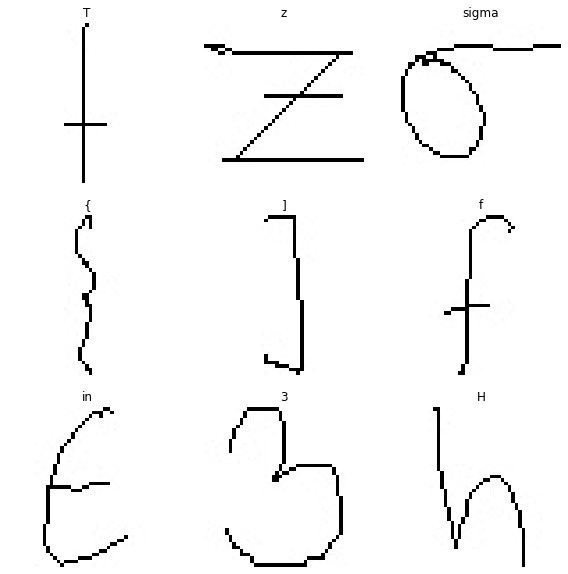

In [3]:
img_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\extracted_images\\"
image_classes = listdir(img_path)
shuffle(image_classes)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, image_class in zip(axes.ravel(), image_classes[:9]):
    image_file = listdir(img_path + image_class + '\\')[0]
    image = mpimg.imread(img_path + image_class + '\\' + image_file)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(image_class)
plt.show()

The dataset was not the highest quality, some basic image processing was required. Using the functions above, each image is converted into binary, morphed so that the holes/missing pixels were closed and then dilated.

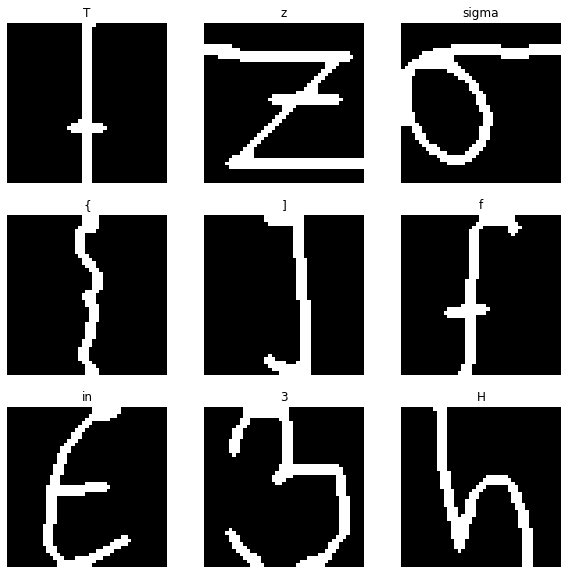

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax, image_class in zip(axes.ravel(), image_classes[:9]):
    image_file = listdir(img_path + image_class + '\\')[0]
    image = mpimg.imread(img_path + image_class + '\\' + image_file)
    new_image = image_processing(image)
    ax.imshow(new_image, cmap='gray')
    ax.axis('off')
    ax.set_title(image_class)
plt.show()

## Combine all files and shuffle

In [5]:
def combine_files(image_classes, training_path, save_path, shuffle=True):
    for path, ending in [(training_path, '_tr.csv'), (crossvalidation_path, '_cv.csv')]:
        all_files = None
        for i, image_class in enumerate(image_classes):
            #print progress
            sys.stdout.write('\r')
            sys.stdout.write('{:.2%}'.format(i/len(image_classes)))
            sys.stdout.flush()
            
            current_class = np.loadtxt(path + image_class + ending, delimiter=',')
            if all_files is None:
                all_files = current_class.copy()
                continue
            all_files = np.vstack([all_files, current_class])
        sys.stdout.write('\r100.00%\n')
        
        # Shuffle
        if shuffle: np.random.shuffle(all_files)
        np.savetxt(save_path + 'all' + ending, all_files, delimiter=',', fmt='%i')

In [7]:
img_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\extracted_images\\"
image_classes = listdir(img_path)

save_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\"
training_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\training\\"
crossvalidation_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\crossvalidation\\"

combine_files(image_classes, training_path, crossvalidation_path, save_path)

100.00%
100.00%


## Image Processing

In [5]:
from matplotlib import image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import cv2

### convert to grayscale and filter out noise

An image taken using a camera is bound to have noise in it. The noise, such that as shadows or specks, is lessened by blurring and thresholding. The image is then dilated to make sure it is thick enough.

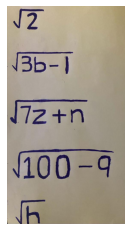

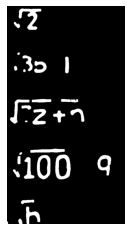

In [1082]:
def input_processing(input_file,dilation_kernel=None, dilation_iterations=1):
    #Binary
    processed_image = cv2.cvtColor(cv2.imread(input_file_name).astype(np.uint8), cv2.COLOR_BGR2GRAY)
    
    #Remove initial noise and smoothen lighting gradient
    processed_image = cv2.GaussianBlur(processed_image, (11, 11), 0)
    
    #Threshold
    processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 0.001)
    
    #Blur
    processed_image = cv2.blur(processed_image, (3, 3))
    
    #Threshold
    processed_image = cv2.threshold(processed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    #Median blur
    processed_image = cv2.medianBlur(processed_image, 17)
    
    #Threshold
    processed_image_bw = 1 - np.round(processed_image/255)
    
    #Dilate
    if not dilation_kernel:
        dilation_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    processed_image_bw = cv2.dilate(processed_image_bw, dilation_kernel, iterations=dilation_iterations)
    
    return processed_image_bw.astype(np.uint8)

# Read in image
input_file_name = 'sqrt1.jpg'
input_file = mpimg.imread(input_file_name)[:, :, 0:3].reshape(-1, 3)
new_shape = list(mpimg.imread(input_file_name).shape)
new_shape[2] = 3
input_file = input_file.reshape(new_shape)

input_file_processed = input_processing(input_file)

plt.imshow(input_file)
plt.axis('off')
plt.show()

plt.imshow(input_file_processed, cmap='gray')
plt.axis('off')
plt.show()

### Break into connected components

After the entire image is processed, the image is broken into connected components as shown below:

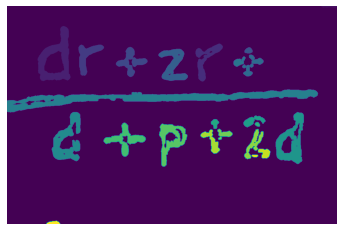

In [1077]:
_, labels = cv2.connectedComponents(input_file_processed)

plt.imshow(labels)
plt.axis('off')
plt.savefig('C:\\Users\\sivuy\\anaconda3\\lib\\site-packages\\pywebio\\html\\expression.png')
plt.show()

### Process each component

Since each component has a different size, additional preprocessing is done to make sure it is not too thick since zooming in will cause the image to become larger. To do this, the image is converted into a square image and the eroded until it is a certain percent of its original

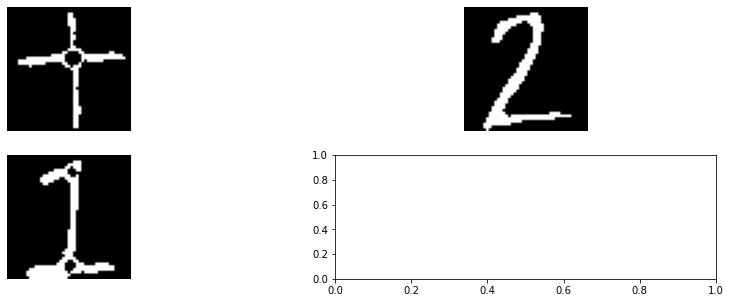

In [1071]:
def pad(arr, pad_width):
    arr_new = np.hstack([np.zeros([arr.shape[0], pad_width]), arr]) #left
    arr_new = np.hstack([arr_new, np.zeros([arr_new.shape[0], pad_width])]) #right
    arr_new = np.vstack([np.zeros([pad_width, arr_new.shape[1]]), arr_new]) #up
    arr_new = np.vstack([arr_new, np.zeros([pad_width, arr_new.shape[1]])]) #down
    return arr_new

def square(arr, pad_width, top, left, bottom, right):
    arr_square = arr[top-pad_width:bottom+pad_width, left-pad_width:right+pad_width]
    diff = abs(arr_square.shape[1] - arr_square.shape[0])
    pad = diff//2
    if arr_square.shape[0] < arr_square.shape[1]:
        arr_square = np.vstack([np.zeros([pad, arr_square.shape[1]]), arr_square]) #up
        arr_square = np.vstack([arr_square, np.zeros([pad + (diff % 2 == 1), arr_square.shape[1]])]) #down
    elif arr_square.shape[0] >= arr_square.shape[1]:
        arr_square = np.hstack([np.zeros([arr_square.shape[0], pad]), arr_square]) #left
        arr_square = np.hstack([arr_square, np.zeros([arr_square.shape[0], pad + (diff % 2 == 1)])]) #right
    return arr_square

def erode(arr, erosion_percentage):
    for dimensions in range(1, 12):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dimensions, dimensions))
        erosion = cv2.erode(arr, kernel, iterations = 1)
        if np.sum(erosion)/np.sum(arr) < erosion_percentage:
            break
    dimensions -= 1
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dimensions, dimensions))
    erosion = cv2.erode(arr, kernel, iterations = 1)
    return erosion
    
def get_components(labels, pad_width=3, erosion_percent=0.4, show=True):
    components = {i:{'label': None,
                    'output': None,
                    'top_left': None,
                    'bottom_right': None,
                    'image':None,
                    'group': None,
                    'sup': False,
                    'sub': False}
                  for i in range(1, len(np.unique(labels)))}
    fig, axes = plt.subplots(2, int((len(components)+1)/2), figsize=(15, 5))
    for i, ax in zip(sorted(components.keys()), axes.ravel()):
        label = labels.copy()
        label[labels !=i] = 0
        label_padded = pad(label, pad_width)
        
        # Get dimentions of component
        xs, ys = np.where(label != 0)
        top, bottom, left, right = np.min(xs), np.max(xs), np.min(ys), np.max(ys)
        components[i]['top_left'] = (top, left)
        components[i]['bottom_right'] = (bottom, right)
        
        # Square and resize
        label_square = square(label_padded, pad_width, top, left, bottom, right)
        label_square = cv2.resize(label_square, (45, 45))
        label_square[label_square != 0] = 1
        
        # Erode based on size
        label_eroded = erode(label_square, erosion_percent)
        components[i]['image'] = label_eroded.ravel()
        
        if show:
            ax.imshow(label_eroded, cmap='gray')
            ax.axis('off')
    if show: plt.show()
    return components

components = get_components(labels)

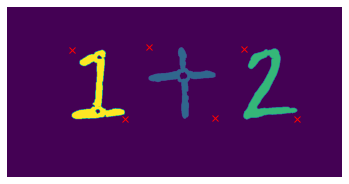

In [1072]:
plt.imshow(labels)
for tl, br in [(components[i]['top_left'], components[i]['bottom_right']) for i in components]:
    plt.plot(*tl[::-1], 'rx')
    plt.plot(*br[::-1], 'rx')
plt.axis('off')
plt.show()

# Model


For the training of the dataset we decided to use a convolutional neural network with a LeNet architecture:
- Input: 45x45
- First Convolution: 6 @ (4, 4)
- First Pooling: Max pool (2, 2)
- Second Convolution: 12 @ (4, 4)
- Second pooling: Max pool (2, 2)
- First full connection: 972 $ \rightarrow $ 240 units
- Second full connection: 240 $ \rightarrow $ 120 units
- Output: 120 $ \rightarrow $ 68 units

#### Load Data

In [10]:
import numpy as np
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt

In [12]:
data_tr = np.loadtxt('C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\crossvalidation\\all_tr.csv', delimiter=',', dtype=int)
data_cv = np.loadtxt('C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\crossvalidation\\all_cv.csv', delimiter=',', dtype=int)

#### Define network

In [169]:
def cnn_model(features, labels, mode):
    """Model function for CNN"""
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 45, 45, 1])
    
    # Convolutional Layer #1
    conv1 = tf.compat.v1.layers.conv2d(
        inputs = input_layer,
        filters = 6,
        kernel_size = [4, 4],
        padding = "valid",
        activation = tf.nn.relu)
    
    # Pooling layer #1
    pool1 = tf.compat.v1.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional layer #2 and pooling layer #2
    conv2 = tf.compat.v1.layers.conv2d(
        inputs = pool1,
        filters = 12,
        kernel_size = [4, 4],
        padding = "valid",
        activation = tf.nn.relu)
    
    # Pooling layer #2
    pool2 = tf.compat.v1.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    # Dense layer #1
    pool2_flat = tf.reshape(pool2, [-1, 972])
    dense1 = tf.compat.v1.layers.dense(inputs=pool2_flat, units=240, activation = tf.nn.relu)
    
    # Desne layer #2
    pool2_flat = tf.reshape(pool2, [-1, 240])
    dense2 = tf.compat.v1.layers.dense(inputs=dense1, units=120, activation = tf.nn.relu)
    
    # Logits layer
    logits = tf.compat.v1.layers.dense(inputs=dense2, units=68)
    
    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.math.argmax(input=logits, axis=1),
        # Add 'softmax_tensor' to the graph. It is used for PREDICT and by the
        # 'logging_hook'
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Calculate Loss (for both TRAIN and EVAL modes)
    onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=68)
    loss = tf.compat.v1.losses.softmax_cross_entropy(
        onehot_labels = onehot_labels, logits=logits)
    
    # Configure the Training Op (for Train mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-2)
        train_op = optimizer.minimize(
            loss = loss,
            global_step = tf.compat.v1.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.compat.v1.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

#### Train on data

In [16]:
train_data = data_tr[:, :-1].astype(np.float32)
train_labels = data_tr[:, -1].astype(np.int32)

eval_data = data_cv[:, : -1].astype(np.float32)
eval_labels = data_cv[:, -1].astype(np.int32)

#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.logging.set_verbosity(tf.logging.INFO)

classifier = tf.estimator.Estimator(
    model_fn = cnn_model, model_dir="cnn_model")

# Train the model
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"x": train_data},y=train_labels,batch_size=250,num_epochs=125, shuffle=True)
classifier.train(input_fn=train_input_fn)#steps=10000
    
# Evaluate the model and print results
eval_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"x":eval_data}, y=eval_labels, num_epochs=1, shuffle=False)
eval_results = classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

NameError: name 'data_tr' is not defined

## Output

We use the saved parameters from the CNN so we can quickly classify new images.

In [12]:
import pandas as pd
df = pd.read_csv('C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\csv\\latex.csv', delimiter=',', header=None)

key = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))

In [13]:
import tensorflow.compat.v1 as tf
classifier = tf.estimator.Estimator(
    model_fn = cnn_model, model_dir="cnn_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'cnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from cnn_model\model.ckpt-135004
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\sivuy\AppData\Local\Temp\ipykernel_11376\321004660.py:7: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv1 = tf.compat.v1.layers.conv2d(
C:\Users\sivuy\AppData\Local\Temp\ipykernel_11376\321004660.py:15: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  pool1 = tf.compat.v1.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
C:\Users\sivuy\AppData\Local\Temp\ipykernel_11376\321004660.py:18: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv2 = tf.compat.v1.layers.conv2d(
C:\Users\sivuy\AppData\Local\Temp\ipykernel_11376\321004660.py:26: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  pool2 = tf.com

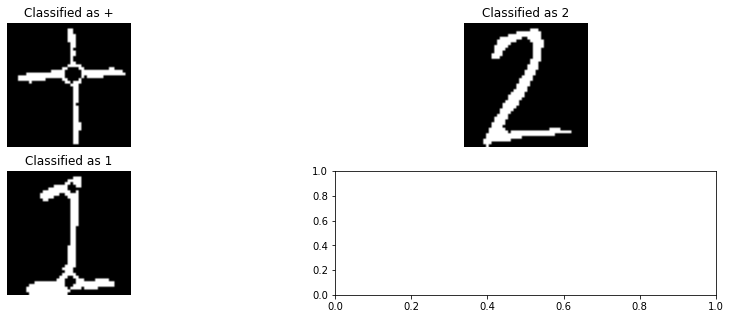

In [1073]:
def classify(components, classifier):
    test = np.asarray([components[i]['image'] for i in sorted(components.keys())]).astype(np.float32)
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x":test},
        y=None,
        batch_size=1,
        num_epochs=1,
        shuffle=False,
        num_threads=1)
    predict_results = classifier.predict(predict_input_fn)
    
    fig, axes = plt.subplots(2, int((len(components) + 1)/2), figsize=(15, 5))
    
    for i, (d, ax) in enumerate(zip(predict_results, axes.ravel())):
        components[i + 1]['label'] = d['classes']
        components[i + 1]['output'] = key[d['classes']]
        
        ax.imshow(components[i + 1]['image'].reshape(45, 45), cmap='gray')
        ax.axis('off')
        ax.set_title('Classified as ' + key[d['classes']])
    plt.show()

    
classify(components, classifier)

In [1066]:
def assign_group(components, offset_threshold=3):
    heights = [[components[i]['top_left'][0], components[i]['bottom_right'][0]] for i in components]
    groups = [heights[0]]
    for height in heights[1:]:
        if height[0] + offset_threshold < groups[-1][1]:
            groups[-1][1] = max(height[1], groups[-1][1])
        else:
            groups.append(height)
    for i in components:
        for group in groups:
            if group[0] < components[i]['top_left'][0] + offset_threshold < group[1]:
                components[i]['group'] = group
    return components, groups

components, groups = assign_group(components)

In [1067]:
# Subscript and Superscript detection $\\frac{a }{3 }$
def identify_script(components, groups):
    for group in groups:
        bottoms = [components[i]['bottom_right'][0] for i in sorted(components.keys()) if components[i]['group'] == group]
        tops = [components[i]['top_left'][0] for i in sorted(components.keys()) if components[i]['group'] == group]
        bottoms_mean = np.mean(bottoms)
        bottoms_std = np.std(bottoms)
        tops_mean = np.mean(tops)
        tops_std = np.std(tops)
        
        if len(bottoms) == 1:
            continue
        for component in components:
            if components[component]['group'] == group:
                s = (bottoms_mean - components[component]['bottom_right'][0]/bottoms_std - (components[component]['top_left'][0] -tops_mean)/tops_std)
                if s > 2.5:
                    components[component]['sup'] = True
                elif s < -2.5:
                    components[component]['sub'] = True
    return components

identify_script(components, groups)

{1: {'label': 56,
  'output': '\\theta',
  'top_left': (116, 870),
  'bottom_right': (327, 996),
  'image': array([0., 0., 0., ..., 0., 0., 0.]),
  'group': [116, 400],
  'sup': True,
  'sub': False},
 2: {'label': 19,
  'output': '\\beta',
  'top_left': (123, 425),
  'bottom_right': (400, 540),
  'image': array([0., 0., 0., ..., 0., 0., 0.]),
  'group': [116, 400],
  'sup': True,
  'sub': False},
 3: {'label': 30,
  'output': '>',
  'top_left': (151, 628),
  'bottom_right': (324, 787),
  'image': array([0., 0., 0., ..., 0., 0., 0.]),
  'group': [116, 400],
  'sup': True,
  'sub': False},
 4: {'label': 16,
  'output': '\\alpha',
  'top_left': (185, 24),
  'bottom_right': (306, 202),
  'image': array([0., 0., 0., ..., 0., 0., 0.]),
  'group': [116, 400],
  'sup': True,
  'sub': False},
 5: {'label': 4,
  'output': '-',
  'top_left': (211, 230),
  'bottom_right': (247, 411),
  'image': array([0., 0., 0., ..., 0., 0., 0.]),
  'group': [116, 400],
  'sup': True,
  'sub': False}}

In [1068]:
def construct_latex(components, groups):
    lr_order = sorted(components.keys(), key=lambda x: components[x]['top_left'][1])
    vsep = {tuple(group):[] for group in groups}
    MODE_SUP = set()
    MODE_SUB = set()
    MODE_SQRT = {}
    
    for l in lr_order:
        t, left = components[l]['top_left']
        b, right = components[l]['bottom_right']
        for g in vsep:
            if g[0] <= t <=b <= g[1]:
                
                if g in MODE_SQRT and left > MODE_SQRT[g]:
                    vsep[g].append('}')
                    del MODE_SQRT[g]
                
                if g in MODE_SUP and not components[l]['sup']:
                    vsep[g].append('}')
                    MODE_SUP.remove(g)
                    
                if g in MODE_SUB and not components[l]['sub']:
                    vsep[g].append('}')
                    MODE_SUB.remove(g)
                    
                if g not in MODE_SUP and components[l]['sup']:
                    vsep[g].append('^{')
                    MODE_SUP.add(g)
                
                if g not in MODE_SUB and components[l]['sub']:
                    vsep[g].append('_{')
                    MODE_SUB.add(g)
                    
                vsep[g].append(components[l]['output'] + ' ')
                if components[l]['output'] == '\\sqrt':
                    MODE_SQRT[g] = right
                    vsep[g].append('{')
                    
                break
    for i in MODE_SQRT:
        vsep[g].append('}')
    for g in vsep:
        vsep[g] = ''.join(vsep[g])
        
    # FRACTION PROCESSING (for now just 3 layers)
    if len(vsep) == 3:
        first_g, _, last_g = list(sorted([g for g in vsep], key = lambda g:g[0]))
        final = '\\frac{' + vsep[first_g] + '}{' + vsep[last_g] + '}'
    else:
        final = list(vsep.values())[0]
    final = '$' + final + '$'
    return final

expression = construct_latex(components, groups)
expression

'$^{\\alpha - \\beta > \\theta $'

In [ ]:
fig, ax = plt.subplots()
ax.text(0.5, 0.5, expression, size=50)
ax.axis('off')
plt.show()

In [43]:
from latex2sympy2 import latex2sympy, latex2latex
from sympy import *

In [76]:
expression = r"5x + x"

In [77]:
sympyexp = latex2sympy(expression)

In [78]:
print(str(sympyexp))

x + 5*x


In [79]:
simplify(sympyexp)

6*x

In [30]:
from PIL import Image
import os
img=Image.open('example.png')
a=img.convert("P", palette=Image.ADAPTIVE, colors=24)
a.save('example2.png')

In [80]:
from pywebio import start_server
import pywebio.input
from pywebio.output import *    
from pywebio.session import *
from pywebio.pin import *
from pywebio import STATIC_PATH

def main():
    imgs = pywebio.input.file_upload("Select some pictures:", accept="image/*", multiple=True)
    for img in imgs:
        put_image(img['content'], width='500px')
    camera_image_name = imgs[0]['filename']
    isthombe = open(STATIC_PATH + '\expression.png', 'rb').read()  
    put_image(isthombe, width='500px')
    put_markdown(str(expression))
    put_markdown(str(simplify(sympyexp)))
    #pywebio.output.put_image("example2.png")
    #popup('Calculation done')

start_server(main, debug=True)

Running on all addresses.
Use http://196.42.121.177:65448/ to access the application


RuntimeError: This event loop is already running

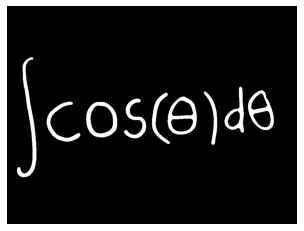

In [38]:
input_file_name = "WhatsApp Image.jpeg"
processed_image = cv2.cvtColor(cv2.imread(input_file_name).astype(np.uint8), cv2.COLOR_BGR2GRAY)
processed_image = cv2.GaussianBlur(processed_image, (11, 11), 0)
processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 0.001)
processed_image = cv2.blur(processed_image, (3, 3))
processed_image = cv2.threshold(processed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
processed_image = cv2.medianBlur(processed_image, 17)
processed_image = 1 - np.round(processed_image/255)
plt.imshow(processed_image,cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
from PIL import Image
img_path = "C:\\Users\\sivuy\\Desktop\\My Final Year Project\\data\\extracted_images\\-"
count = 0
klas = "-"
# for image in listdir(img_path):
#     img_read = mpimg.imread(img_path + "\\" + image)
#     new_image = image_processing(img_read)
#     plt.imshow(new_image,cmap='gray')
#     plt.title(image)
#     plt.axis('off')
#     plt.show()
#     count =  count + 1
#     if count > 2:
#         break
image = listdir(img_path)[0]
img_read = mpimg.imread(img_path + "\\" + image)
new_image = image_processing(img_read)
img_as_array = np.asarray(new_image).astype(np.float32)



test = img_as_array
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
     x={"x":test},
     y=None,
     batch_size=1,
     num_epochs=1,
     shuffle=False,
     num_threads=1)
predict_results = classifier.predict(predict_input_fn)
for prediction in predict_results:
    print('result: {}'.format(prediction))

#predictions = list(classifier.predict(input_fn=predict_input_fn))
#predicted_classes = [p["classes"] for p in predictions]

#print("New Samples, Class Predictions:    {}\n".format(predicted_classes))